In [113]:
%%capture
%pip install seaborn

In [114]:
import re
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("dark")

class DictStats():
    def __init__(self, length, size, load, collisions, distribution) -> None:
        self.length = length
        self.size = size
        self.load = load
        self.collisions = collisions
        self.distribution = distribution.strip().split(" ")

In [115]:
entries = []
with open("stats.txt") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        if line.startswith("Hash"):
            length = int(re.search(r"\d+", line)[0])
            size = int(lines[idx+1].split(": ")[1])
            load = float(lines[idx+2].split(": ")[1])
            collisions = int(lines[idx+3].split(": ")[1])
            if lines[idx+4].startswith("Distribution"):
                dist_flag = True
                distribution = lines[idx+5]
                entries.append(DictStats(length, size, load, collisions, distribution))
            else:
                entries.append(DictStats(length, size, load, collisions))

In [116]:
%%capture
df = pd.DataFrame(columns=["length", "size", "load", "collisions", "entries", "collision_rate"], dtype=int)
for entry in entries:
    df_entry = [entry.length, entry.size, entry.load, entry.collisions, entry.size*entry.load, entry.collisions/entry.size*entry.load]
    df = df.append(pd.Series(df_entry, index=df.columns), ignore_index=True)
# Biggest hash table (takes a lot of time to unpack)
if dist_flag:
    dist = pd.DataFrame(columns=["distribution"], dtype=int)
    for i in entries[14].distribution:
        dist = dist.append(pd.Series([int(i)], index=dist.columns), ignore_index=True)

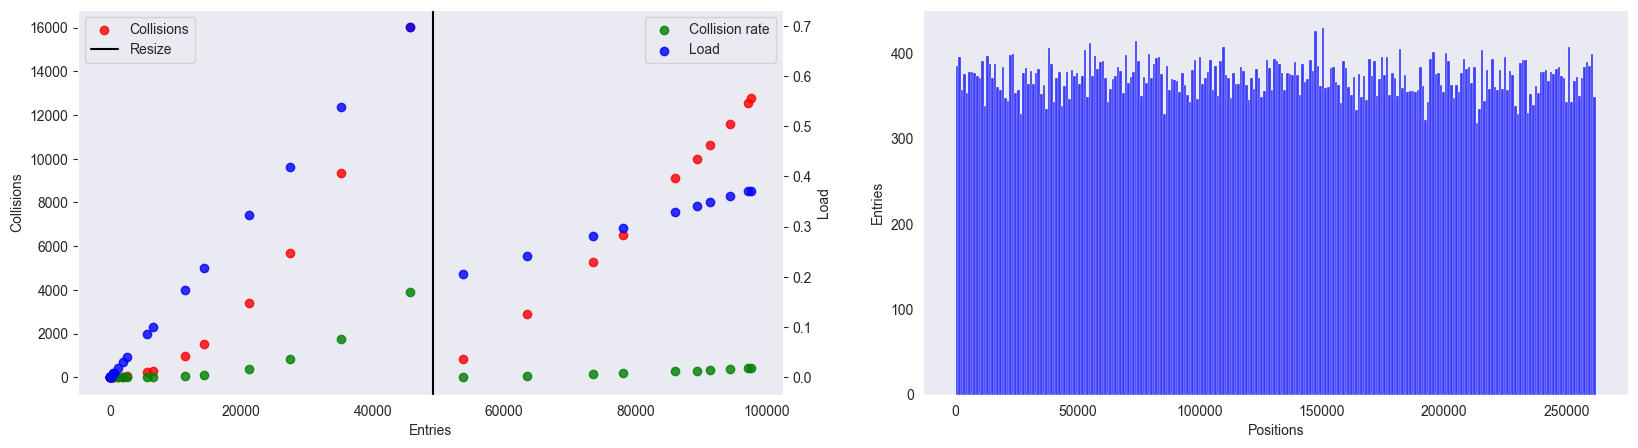

In [117]:
if dist_flag:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
else:
    fig, ax1 = plt.subplots(figsize=(20, 5))
ax1_2 = ax1.twinx()

sns.regplot(df, x="entries", y="collision_rate", fit_reg=False, ax=ax1_2, color="green", label="Collision rate")
sns.regplot(df, x="entries", y="collisions", fit_reg=False, ax=ax1, color="red", label="Collisions")
sns.regplot(df, x="entries", y="load", fit_reg=False, ax=ax1_2, color="blue", label="Load")

ax1.set_ylabel("Collisions")
ax1_2.set_ylabel("Load")
ax1.set_xlabel("Entries")
ax1.legend(loc="upper left")
ax1_2.legend(loc="upper right")

if dist_flag:
    sns.histplot(dist, x="distribution", bins=250, ax=ax2, color="blue", label="Distribution")
    ax2.set_ylabel("Entries")
    ax2.set_xlabel("Positions")

ax1.axvline(x=entries[0].size*0.75, color="black", linestyle="-", label="Resize")
ax1.legend(loc="upper left")

plt.show()

In [118]:
print(f"Average load: {df[df['load'] != 0]['load'].mean()}")
print(f"Collision per entry: {df['collisions'].sum() / df['entries'].sum()}")
df.sort_values(by=['entries'], inplace=True, ascending=False)
print(f"Most common word lengths: {df.head(5)['length'].values[0:5]}")

Average load: 0.19373941161333333
Collision per entry: 0.11980795068571244
Most common word lengths: [14. 15. 13. 12. 16.]
